Welcome to my home assignment for the Programming course!
Here I will visualize fMRI data on bipolar disorder and make a histogram of the fMRI data

Project Title: Programming for Psychologist, Meta-analysis of FMRI data on bipolar disorder

Name: Elisa Bierman

Date of Completion: 04-12-2025

Link to data: https://neurosynth.org/analyses/terms/bipolar%20disorder/

The figure shows colored 3D voxels in regions that have shown consistent activity in fMRI data of 130 studies with a high frequency of mentioning the term bipolar disorder.

First I make objects for the path of the anatomical and functional MRI data. These are relative paths.

In [1]:
#Locate MRI data

#set directories, relative path
an_directory = r".\anatomical.nii.gz" #anatomical data
fun_directory = r".\bipolar disorder_uniformity-test_z_FDR_0.01.nii.gz" #functional data (uniform)

Then I plot the functional data on top of the structural anatomical data to visualize the active regions. I chose a dissection point at one of the regions with the highest Z-scores.


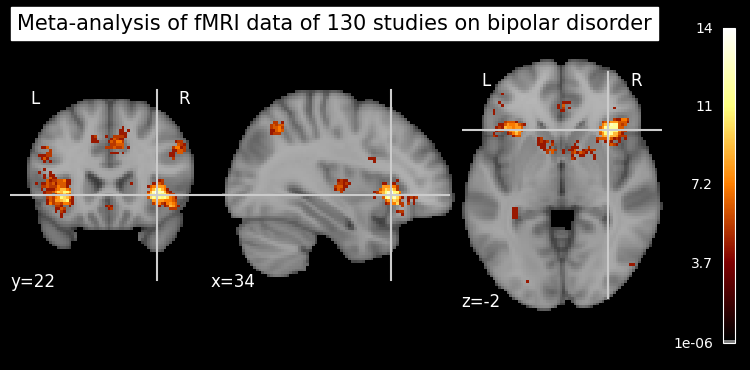

In [ ]:
#visualize data with plot_stat_map from nilearn package

import nilearn as nl
from nilearn import plotting
import matplotlib 


nl.plotting.plot_stat_map(fun_directory, an_directory, 
                          cut_coords = (34, 22, -2), 
                          title = 'Meta-analysis of fMRI data of 130 studies on bipolar disorder', 
                          cmap = 'afmhot',
                          vmin = 0.1)

plotting.show() #not needed in Jupyter Notebook but this is needed in python script

Next, the functional data is shown in a histogram, showing  the frequency of every Z-score.
For this, the functional data is first loaded with nibabel and transferred to a Numpy array. Then only the positive values are selected and these values are plotted in a histogram.

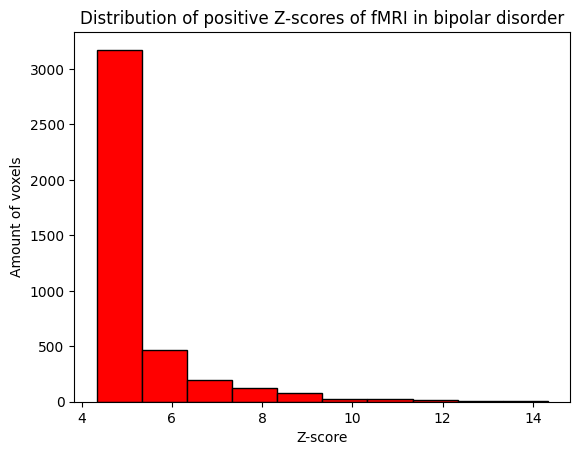

In [ ]:
#make a histogram of the functional data 

#load the functional data file

#import nibabel for loading the functional data 
import nibabel as nib
#import matplotlib package pyplot for plotting a histogram
import matplotlib.pyplot as plt
#import numpy
import numpy as np

#load data as object instead of path
fun_data = nib.load(fun_directory)

#datatype check
# print(type(fun_data)) #response: <class 'nibabel.nifti1.Nifti1Image'>

#to plot with axes.hist from matplotlib, change data to Numpy array
arrayfun_data = fun_data.get_fdata()
# print(type(functionaldata)) #response: <class 'numpy.ndarray'>

# select all positive values of the functional data
fun_data_pos = arrayfun_data[arrayfun_data > 0]

# make a histogram
fig, ax = plt.subplots(1,1)
ax.hist(fun_data_pos, bins=10, edgecolor='black', color='red')

ax.set_title("Distribution of positive Z-scores of fMRI in bipolar disorder", loc="center")
ax.set_ylabel('Amount of voxels')
ax.set_xlabel('Z-score')

plt.show()